CORE - CLOSE AND SPARSE EPYC FLOAT 

In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [31]:
with open('../core_scalability/EPYC/CLOSE/blis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../core_scalability/EPYC/CLOSE/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../core_scalability/EPYC/CLOSE/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


with open('../core_scalability/EPYC/SPREAD/blis.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_blis = list(reader)

with open('../core_scalability/EPYC/SPREAD/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_oblas = list(reader)

with open('../core_scalability/EPYC/SPREAD/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_mkl = list(reader)




In [34]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((128, 5, 4))
    j = 0
    for i in range(0,128):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method = np.empty((128, 4))
    for i in range(0,128):
            method[i]=  np.mean(data_per_dimension[i], axis=0)

    return method

In [35]:
mkl=PLOT(data_mkl)
oblas=PLOT(data_oblas)
blis=PLOT(data_blis)

s_mkl=PLOT(s_data_mkl)
s_oblas=PLOT(s_data_oblas)
s_blis=PLOT(s_data_blis)

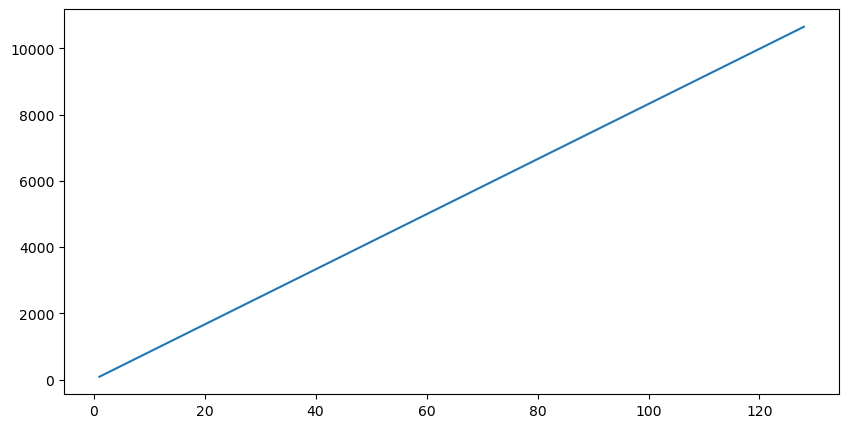

In [38]:
x = np.linspace(1, 128, 128)
y = 83.2*x
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

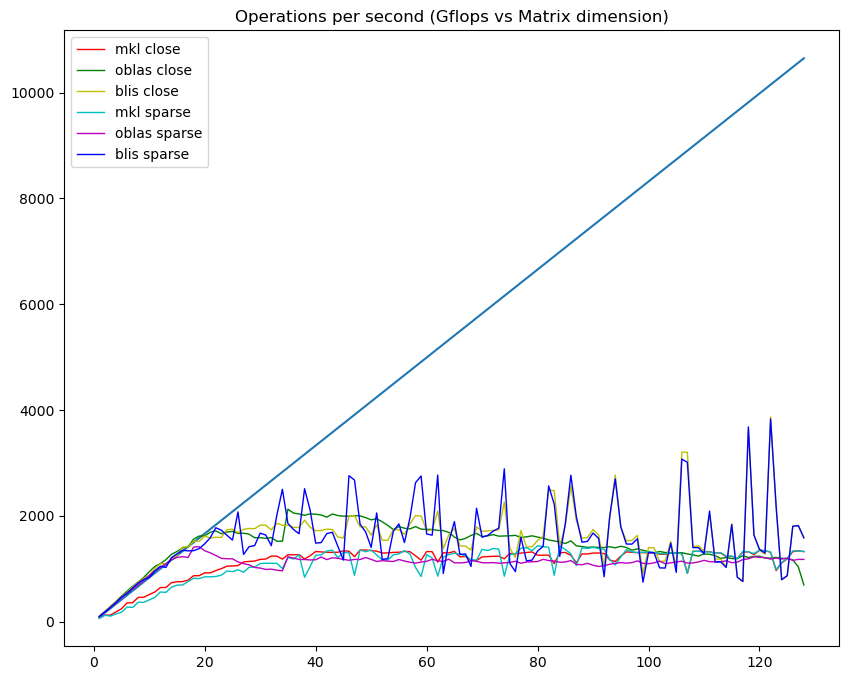

In [49]:
plt.figure(figsize=(10,8))
plt.plot(range(1,129,1), mkl[:,3], color='r', label='mkl close', linewidth=1)
#plt.scatter(range(1,129,1), mkl[:,3], color='r')

plt.plot(x, y)

plt.plot(range(1,129,1), oblas[:,3], color='g', label='oblas close', linewidth=1)
#plt.scatter(range(1,129,1), oblas[:,3], color='g')

plt.plot(range(1,129,1), blis[:,3], color='y', label='blis close', linewidth=1)
#plt.scatter(range(1,129,1), blis[:,3], color='y')


plt.plot(range(1,129,1), s_mkl[:,3], color='c', label='mkl sparse', linewidth=1)
#plt.scatter(range(1,129,1), s_mkl[:,3], color='c')

plt.plot(range(1,129,1), s_oblas[:,3], color='m', label='oblas sparse', linewidth=1)
#plt.scatter(range(1,129,1), s_oblas[:,3], color='m')

plt.plot(range(1,129,1), s_blis[:,3], color='b', label='blis sparse', linewidth=1)
#plt.scatter(range(1,129,1), s_blis[:,3], color='b')


plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend()
plt.show()
